# Step1: Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
pd.set_option('display.float_format', '{:.1f}'.format)

# Step2: Loading The Data

In [2]:
df = pd.read_csv("Datasets/insurance.csv")

# Step3: EDA

In [3]:
#first 10 rows of the data
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.9
1,18,male,33.8,1,no,southeast,1725.6
2,28,male,33.0,3,no,southeast,4449.5
3,33,male,22.7,0,no,northwest,21984.5
4,32,male,28.9,0,no,northwest,3866.9
5,31,female,25.7,0,no,southeast,3756.6
6,46,female,33.4,1,no,southeast,8240.6
7,37,female,27.7,3,no,northwest,7281.5
8,37,male,29.8,2,no,northeast,6406.4
9,60,female,25.8,0,no,northwest,28923.1


In [4]:
#information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
#statistical measures of the data
df.describe()

,age,bmi,children,charges
count,1338.0,1338.0,1338.0,1338.0
mean,39.2,30.7,1.1,13270.4
std,14.0,6.1,1.2,12110.0
min,18.0,16.0,0.0,1121.9
25%,27.0,26.3,0.0,4740.3
50%,39.0,30.4,1.0,9382.0
75%,51.0,34.7,2.0,16639.9
max,64.0,53.1,5.0,63770.4


In [6]:
#shape of the data
df.shape

(1338, 7)

In [7]:
#data types of the data
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
#number of the null values in the data
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
#number of duplicates in the data
df.duplicated().sum()

1

In [10]:
#unique values of categorical features
print(df["sex"].unique())
print(df["smoker"].unique())
print(df["region"].unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [11]:
#correlation between the numerical columns
numerical_columns = ["age", "bmi", "children", "charges"]
df[numerical_columns].corr()

,age,bmi,children,charges
age,1.0,0.1,0.0,0.3
bmi,0.1,1.0,0.0,0.2
children,0.0,0.0,1.0,0.1
charges,0.3,0.2,0.1,1.0


<Axes: >

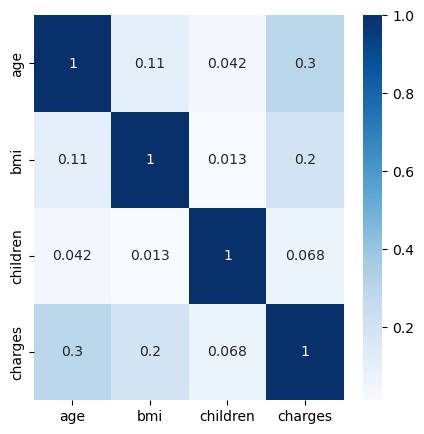

In [12]:
#heatmap for clear image of correlation
plt.figure(figsize = (5, 5))
sns.heatmap(df[numerical_columns].corr(), annot = True, cbar = True, cmap = "Blues")

<Axes: xlabel='Age'>

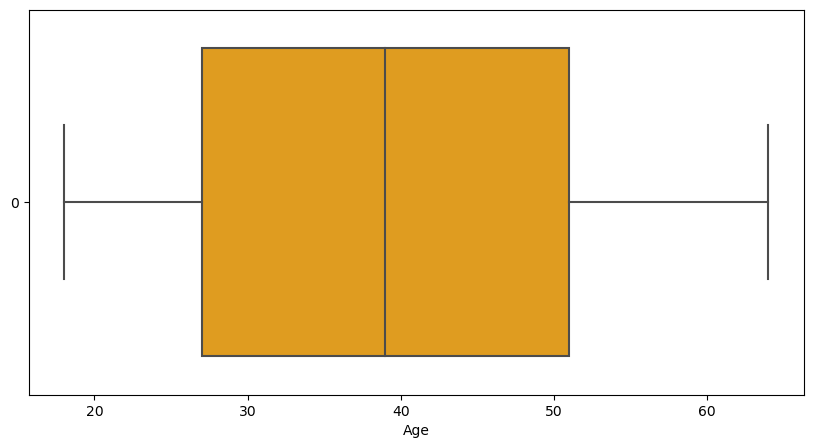

In [13]:
#boxplot for age feature to check the outliers
plt.figure(figsize = (10, 5))
plt.xlabel("Age")
sns.boxplot(df["age"], orient = "h", color = "orange")

<Axes: xlabel='BMI'>

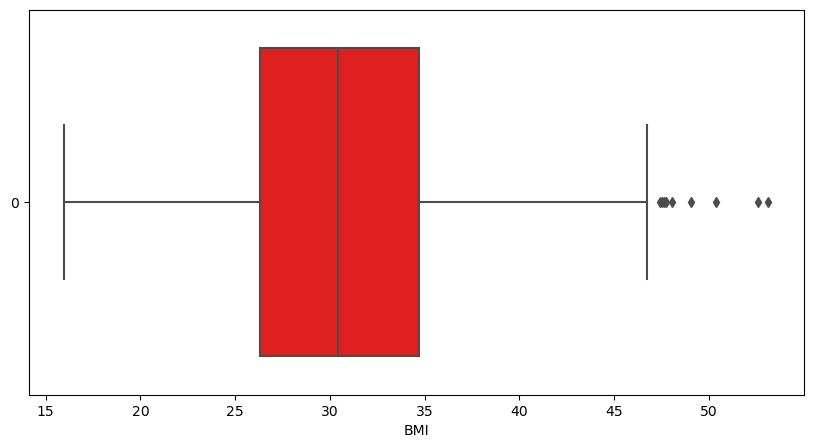

In [14]:
#boxplot for bmi feature to check the outliers
plt.figure(figsize = (10, 5))
plt.xlabel("BMI")
sns.boxplot(df["bmi"], orient = "h",color="red")

<Axes: xlabel='Children'>

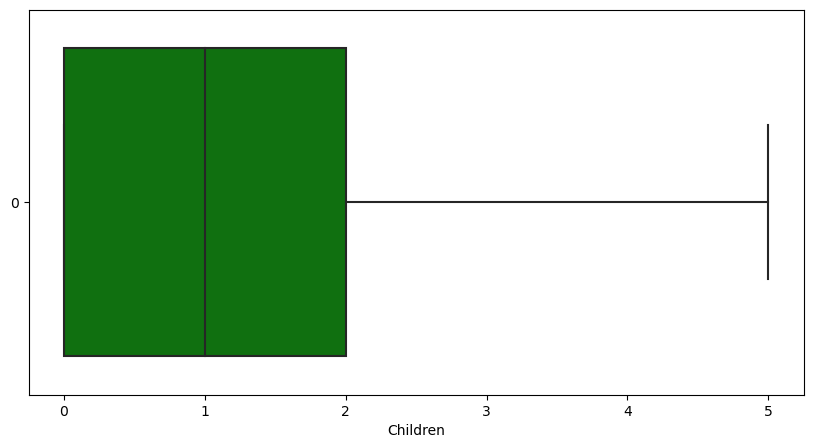

In [15]:
#boxplot for children feature to check the outliers
plt.figure(figsize = (10, 5))
plt.xlabel("Children")
sns.boxplot(df["children"], orient = "h",color="green")

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

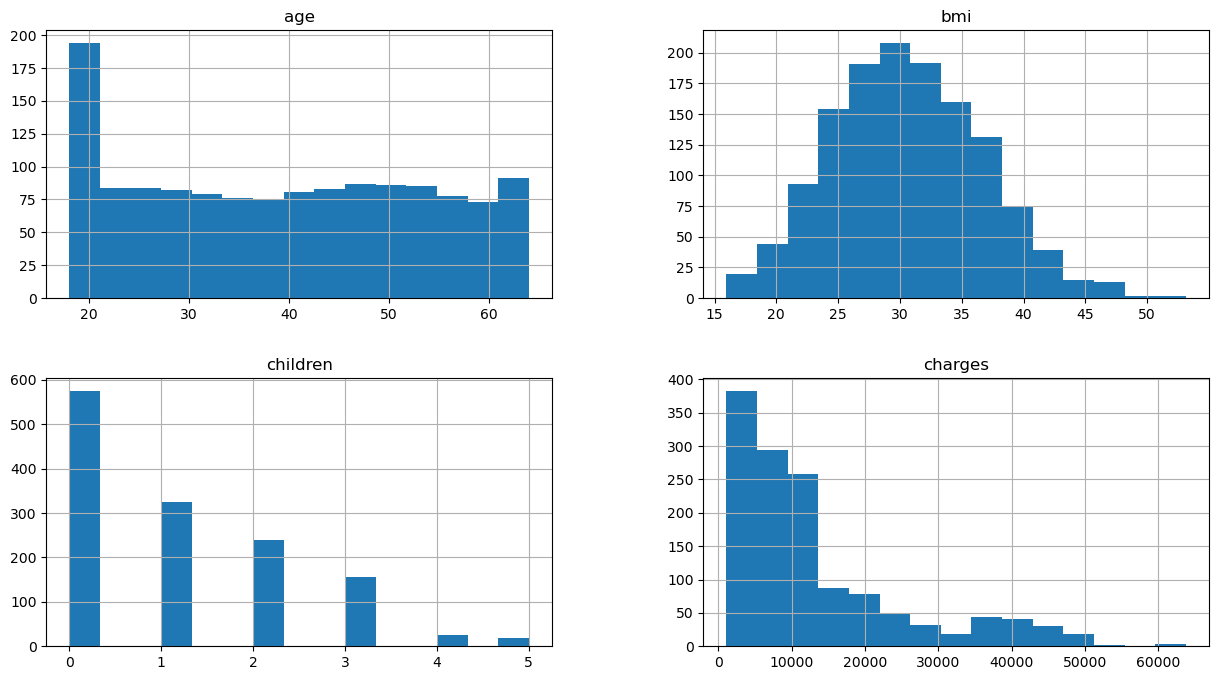

In [16]:
#histograms for all the data
df.hist(bins = 15, figsize = (15, 8))

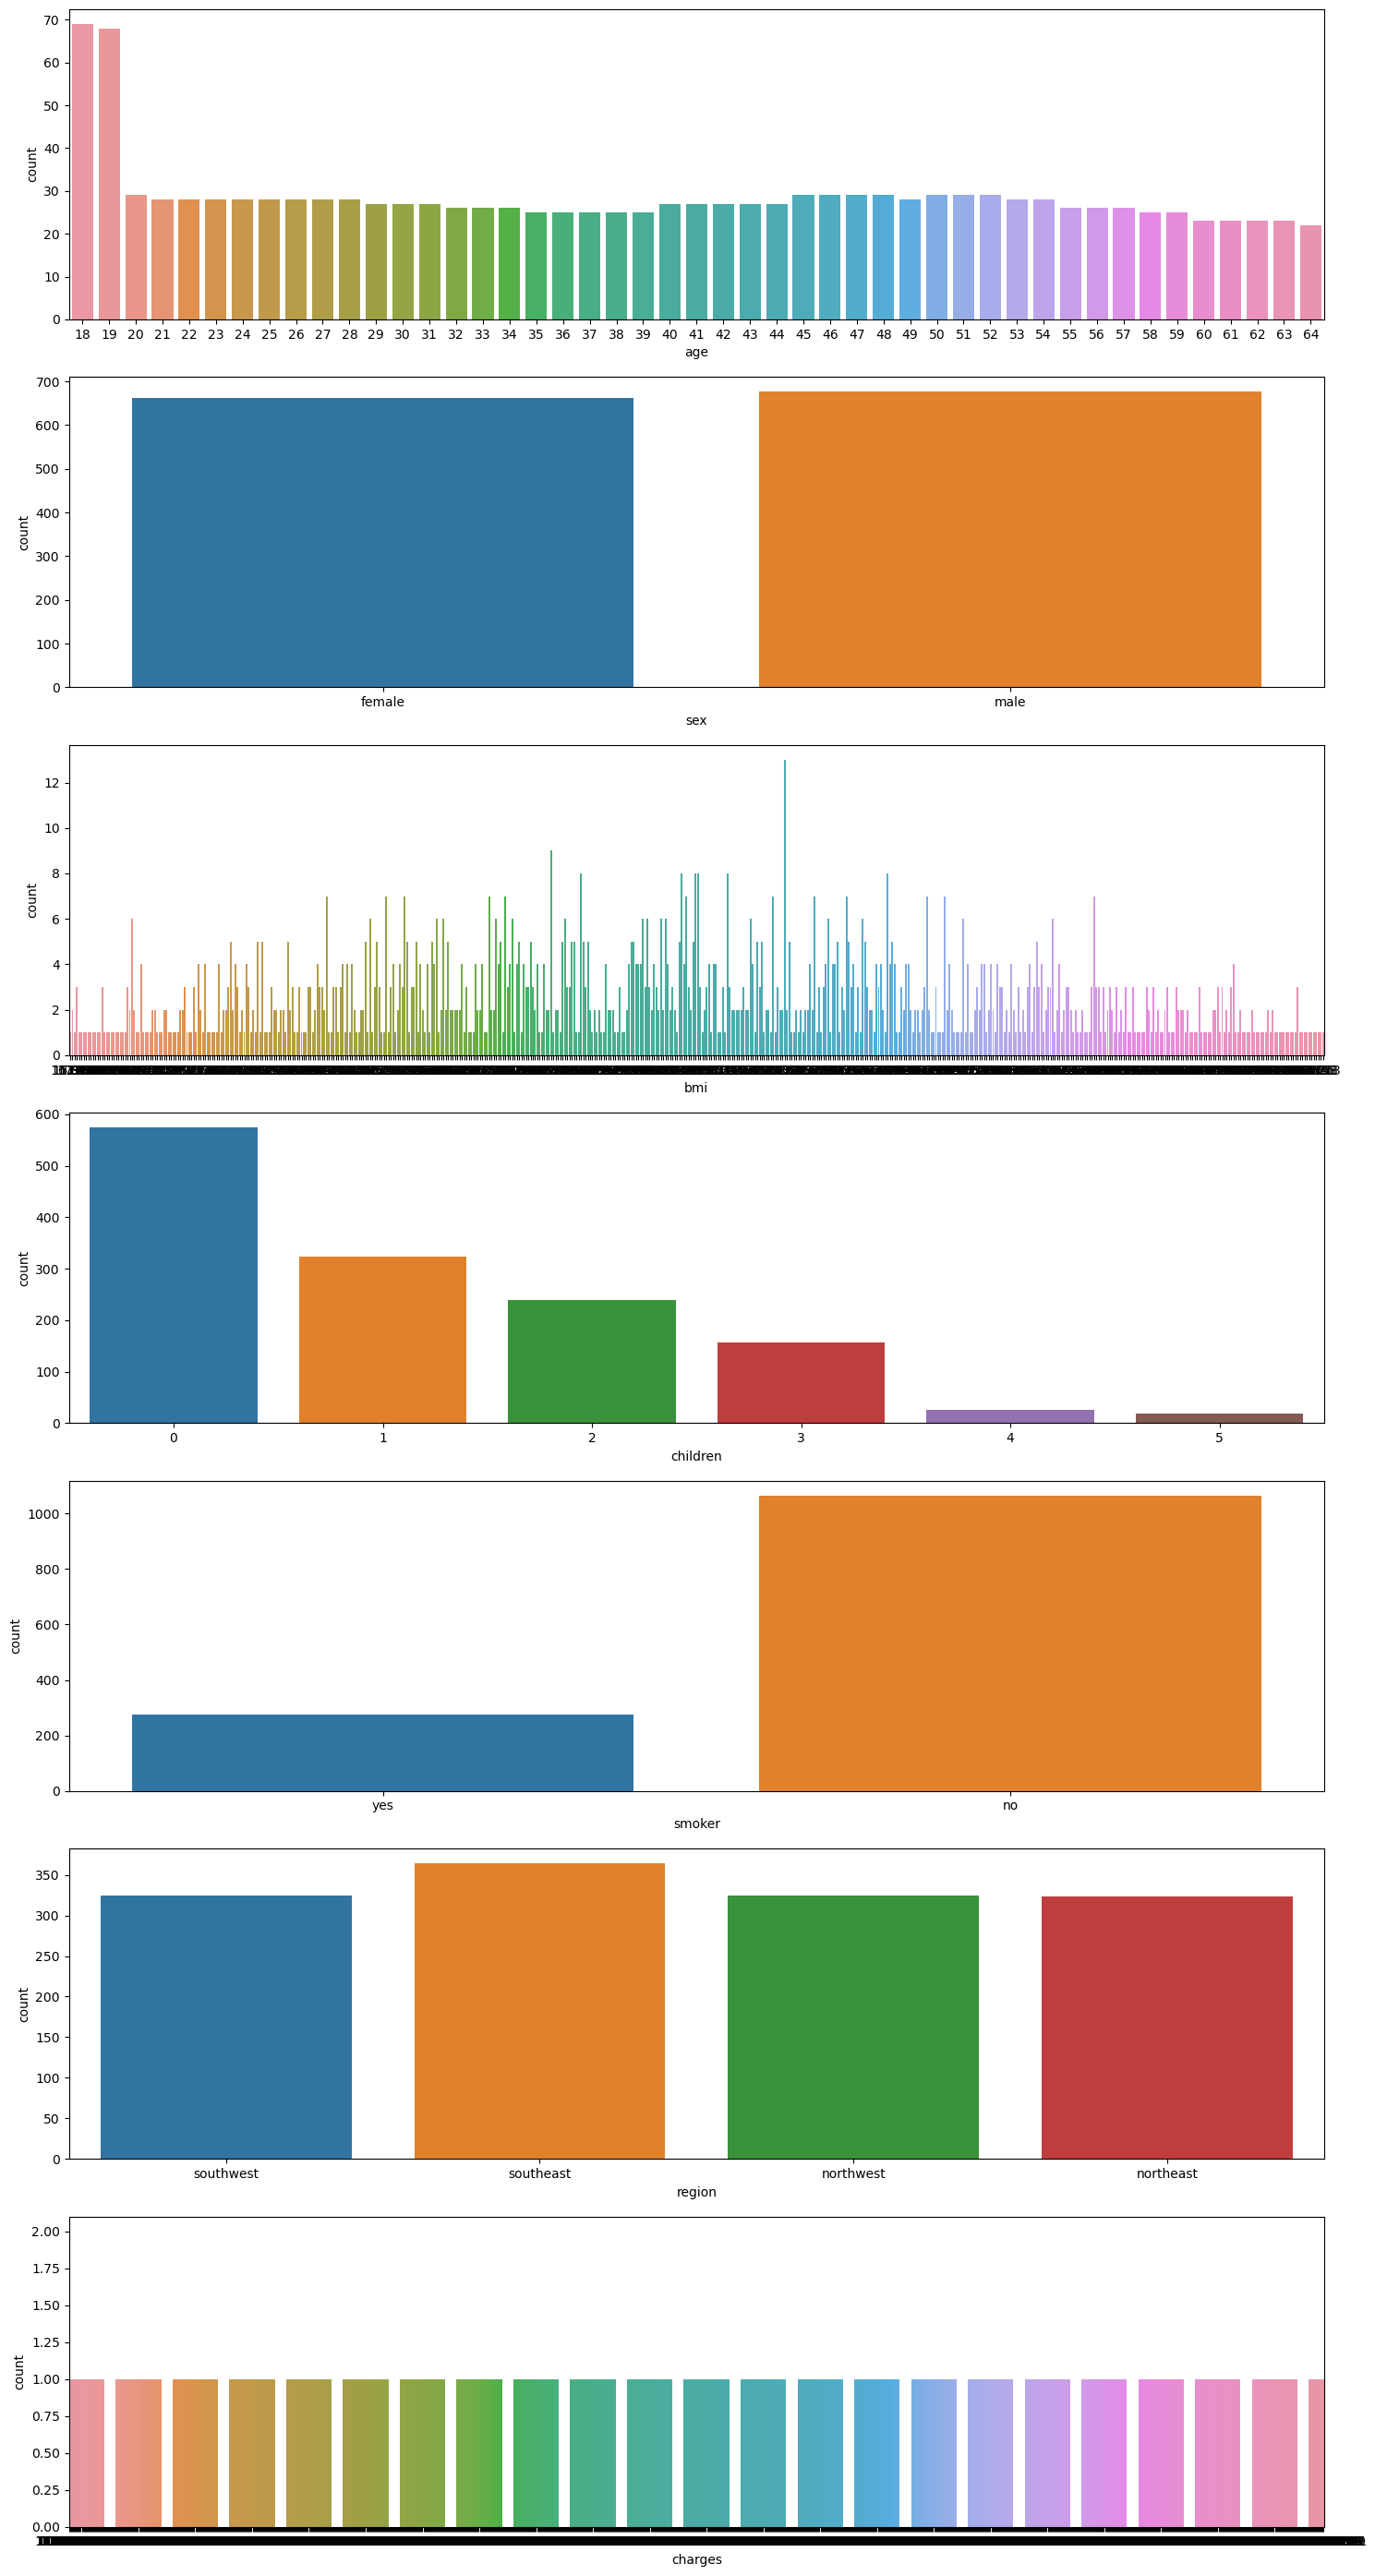

In [17]:
#countplots for all data
fig, axes = plt.subplots(nrows = len(df.columns), figsize = (15, 4 * len(df.columns)))

for i, column in enumerate(df.columns):
    sns.countplot(x = column, data = df, ax = axes[i])

plt.tight_layout()
plt.show()

# Step4: Splitting The Data to Train and Test

In [18]:
#variable for features and variable for label
x = df.drop("charges", axis = 1)
y = df["charges"]

#splitting the data to train, test and validation 
x_temp, x_test, y_temp, y_test = train_test_split(x,y,test_size=(1 - (1000/len(x))) ,random_state=4)
x_train, x_val, y_train, y_val = train_test_split(x_temp,y_temp,test_size= (250/len(x_temp)) ,random_state=4)

# Step5: Data Preprocessing

In [19]:
#handling outliers function
def handle_outliers(data,feature):
    Q1=data[feature].quantile(0.25)
    Q3=data[feature].quantile(0.75)
    IQR=Q3-Q1
    lower_limit=Q1-1.5*IQR
    upper_limit=Q3+1.5*IQR
    
    data[feature]=np.where(data[feature] > upper_limit, upper_limit, np.where(data[feature] < lower_limit, lower_limit, data[feature]))
    return data[feature]

#preprocessing function
def preprocessing(data):
    data=data.copy()
    #dropping the duplicates in the data
    df.drop_duplicates(inplace=True)
    
    #handling the outliers
    data["bmi"]=handle_outliers(data,"bmi")
    
    #encode categorical features
    sex_mapping = {'male' : 1, 'female' : 0}
    smoker_mapping = {"no" : 0, "yes" : 1}
    region_mapping = {"southwest" : 0, "southeast" : 1, "northwest" : 2, "northeast" : 3}
    data["sex"] = data["sex"].map(sex_mapping)
    data["smoker"] = data["smoker"].map(smoker_mapping)
    data["region"] = data["region"].map(region_mapping)
    
    return data

#preprocessed x_train and x_test
x_train_preprocessed = preprocessing(x_train)
x_test_preprocessed = preprocessing(x_test)
x_val_preprocessed = preprocessing(x_val)
#feature scaling to the previous data

#initialize standard scaler function
scaler = StandardScaler()

#scaling the data based on the mean and the standard deviation of the x_train
x_train_preprocessed = scaler.fit_transform(x_train_preprocessed)
x_test_preprocessed = scaler.transform(x_test_preprocessed)
x_val_preprocessed = scaler.transform(x_val_preprocessed)

# Step6: Modelling

In [20]:
#linear regression
liner = LinearRegression()
liner.fit(x_train_preprocessed,y_train)
y_pred = liner.predict(x_test_preprocessed)
Liner_r2_score = r2_score(y_test,y_pred)*100

In [21]:
#printing the accuracy
print("Linear Regression Accuracy: %.2f" % Liner_r2_score ,"%")

Linear Regression Accuracy: 71.25 %
